In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv(
    "../data/processed/macro_stationary.csv",
    parse_dates=["date"]
)
df = df.set_index("date")

y = df["inflation_rate"]


In [3]:
split_date = "2015-01-01"

train = y[y.index < split_date]
test  = y[y.index >= split_date]


In [4]:
naive = test.shift(1)
naive = naive.dropna()
test_naive = test.loc[naive.index]

In [5]:
rolling_mean = train.rolling(window=12).mean().iloc[-1]
rolling = pd.Series(rolling_mean, index=test.index)


In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,0,1))
fit = model.fit()
arima = fit.forecast(steps=len(test))
arima.index = test.index


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
results = pd.DataFrame({
    "MAE": [
        mean_absolute_error(test_naive, naive),
        mean_absolute_error(test, rolling),
        mean_absolute_error(test, arima)
    ]
}, index=["Naive", "Rolling Mean", "ARIMA"])

results


,MAE
Naive,0.001928
Rolling Mean,0.002535
ARIMA,0.001978


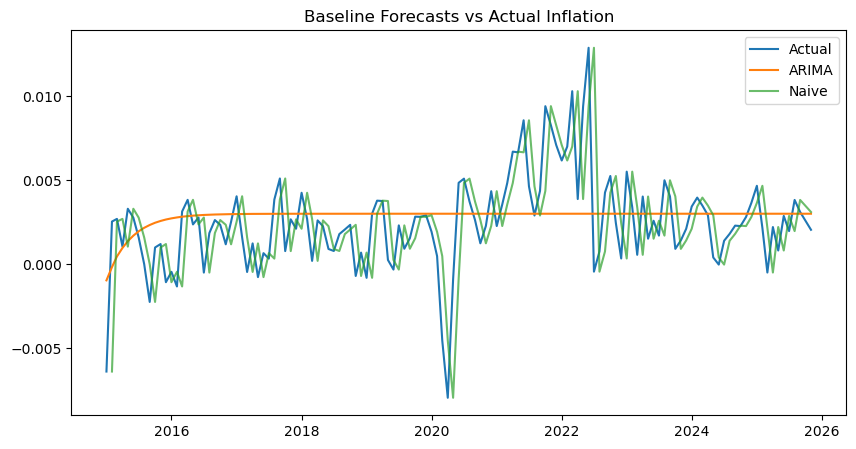

In [8]:
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual")
plt.plot(arima.index, arima, label="ARIMA")
plt.plot(naive.index, naive, label="Naive", alpha=0.7)
plt.legend()
plt.title("Baseline Forecasts vs Actual Inflation")
plt.show()


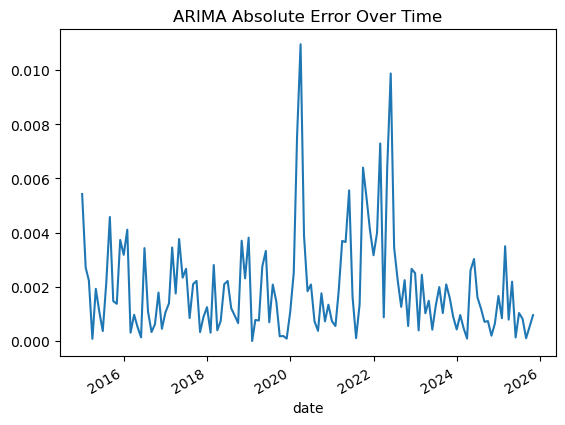

In [9]:
abs_error = (test - arima).abs()

abs_error.plot(title="ARIMA Absolute Error Over Time")
plt.show()

Observation

Forecast errors spike during periods of macroeconomic stress, suggesting that regime changes dominate model performance

KEY FINDINGS:

SIMPLE PERSISTENCE MODELS SET UP A PERFORMANCE FLOOR. ARIMA MATGINALLY IMPROVES OVER IT BUT GIVES HIGH ERROR DURING REGIME SHIFTS.
ML MODELS ADD LIMITED VALUE , FORECASTING DETERIORATES DURING CRISIS.

Limitations


Monthly frequency limits sample size

Structural breaks violate stationarity assumptions

Models do not incorporate real-time release lags